<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Ames Housing Data
By Amira (DSI-28)

---
# Problem Statement

   We are a team of data scientists working for a real estate agency in Ames, Iowa. 

   We have been tasked to identify features that are the best predictors of housings prices in the city and create a model that will produce predictions with the best metrics (R2 score and RMSE score). 

   The model will benefit our real agents, by providing a real gauge of housing prices based on key features, which can they draw reference from when they are advising clients looking at buying/selling their homes.  

   Some of the questions that a property agent might have include:
1. At what price should I advise my client to sell or buy a particular house? 
2. What features of the house are more important in determining house price?
3. Are there any features that my client can improve or remodel to fetch a higher price, if they intend to sell? 

---
# Structure

To organise my work better, I have organised this project into two notebooks: 

- Notebook 1 : Exploratory Data Analysis & Data Cleaning
- Notebook 2: Data Preprocessing & Modelling

<span style='color:red'>**This is Notebook 1.**</span>

---
## Part 1: Exploratory Data Analysis & Data Cleaning

In [1]:
# import required libraries/packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure

import scipy.stats as stats

pd.options.display.max_rows = 500
pd.options.display.max_columns = 100

sns.set(font_scale=1.3)
sns.set_style("ticks")

In [2]:
# import housing train and test datasets

ames_train = pd.read_csv('./datasets/train.csv')
ames_test = pd.read_csv('./datasets/test.csv')

# standardize column names for easy ref later

ames_train.columns = ames_train.columns.str.lower().str.replace(' ','_')
ames_test.columns = ames_test.columns.str.lower().str.replace(' ','_')

# create copy of ames dataframe for EDA and cleaning steps to retain original data
ames = ames_train.copy()
test = ames_test.copy()

**Summary**
1. The train dataset has 81 columns and 2051 rows, while the test dataset has 80 columns and 878 rows. 
2. There is a mix of datatypes: str object, integers and floats. 
3. The houses are sold between 2006 and 2010. 
4. The cheapest house sold for \\$12,789 and the most expensive house sold for \\$611,657, with median price at \\$162,500.
5. The oldest house ever sold was built in 1872 and the newest house was built in 2010 (same year it was sold). 
6. For houses that fall within the median, they are likely to be single-storey with 3 bedrooms (above ground), 1 kitchen (above ground), 2 full bathrooms, a garage fit for two cars, a basement and one fireplace. They are less likely to have any pool, porch or masonry veneer. 

**Here are the key steps that I took:**
1. Reassign one column i.e. ms_subclass from numeric to categorical data.
2. Reassign several columns from ordinal categorical data into ordinal numeric data. 

In [3]:
print(ames.shape)
print(test.shape)

(2051, 81)
(878, 80)


In [4]:
# noted that train data does not have the same no. of columns as test data
# this is expected because the test data is not supposed to have the saleprice column

# to verify that saleprice is the only differing column: 
len(ames.drop('saleprice', axis=1).columns) == len(test.columns)

True

In [5]:
# display last 5 rows in the dataframe 
ames.tail()

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
2046  1587  921126030           20        RL          79.0     11449   Pave   
2047   785  905377130           30        RL           NaN     12342   Pave   
2048   916  909253010           50        RL          57.0      7558   Pave   
2049   639  535179160           20        RL          80.0     10400   Pave   
2050    10  527162130           60        RL          60.0      7500   Pave   

     alley lot_shape land_contour utilities lot_config land_slope  \
2046   NaN       IR1          HLS    AllPub     Inside        Gtl   
2047   NaN       IR1          Lvl    AllPub     Inside        Gtl   
2048   NaN       Reg          Bnk    AllPub     Inside        Gtl   
2049   NaN       Reg          Lvl    AllPub     Corner        Gtl   
2050   NaN       Reg          Lvl    AllPub     Inside        Gtl   

     neighborhood condition_1 condition_2 bldg_type house_style  overall_qual  \
2046       Timber        Norm        Norm      1Fam      1Story             8   
2047      Edwards        Norm        Norm      1Fam      1Story             4   
2048      Crawfor        Norm        Norm      1Fam      1.5Fin             6   
2049        NAmes        Norm        Norm      1Fam      1Story             4   
2050      Gilbert        Norm        Norm      1Fam      2Story             7   

      overall_cond  year_built  year_remod/add roof_style roof_matl  \
2046             5        2007            2007      Gable   CompShg   
2047             5        1940            1950      Gable   CompShg   
2048             6        1928            1950      Gable   CompShg   
2049             5        1956            1956      Gable   CompShg   
2050             5        1999            1999      Gable   CompShg   

     exterior_1st exterior_2nd mas_vnr_type  mas_vnr_area exter_qual  \
2046      VinylSd      VinylSd         None           0.0         Gd   
2047      VinylSd      VinylSd         None           0.0         TA   
2048      BrkFace        Stone         None           0.0         TA   
2049      Plywood      Plywood         None           0.0         TA   
2050      VinylSd      VinylSd         None           0.0         TA   

     exter_cond foundation bsmt_qual bsmt_cond bsmt_exposure bsmtfin_type_1  \
2046         TA      PConc        Gd        TA            Av            GLQ   
2047         TA     CBlock        TA        TA            No            BLQ   
2048         TA     BrkTil        TA        TA            No            Unf   
2049         TA     CBlock        TA        TA            No            Rec   
2050         TA      PConc        TA        TA            No            Unf   

      bsmtfin_sf_1 bsmtfin_type_2  bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf  \
2046        1011.0            Unf           0.0        873.0         1884.0   
2047         262.0            Unf           0.0        599.0          861.0   
2048           0.0            Unf           0.0        896.0          896.0   
2049         155.0            LwQ         750.0        295.0         1200.0   
2050           0.0            Unf           0.0        994.0          994.0   

     heating heating_qc central_air electrical  1st_flr_sf  2nd_flr_sf  \
2046    GasA         Ex           Y      SBrkr        1728           0   
2047    GasA         Ex           Y      SBrkr         861           0   
2048    GasA         Gd           Y      SBrkr        1172         741   
2049    GasA         TA           Y      SBrkr        1200           0   
2050    GasA         Gd           Y      SBrkr        1028         776   

      low_qual_fin_sf  gr_liv_area  bsmt_full_bath  bsmt_half_bath  full_bath  \
2046                0         1728             1.0             0.0          2   
2047                0          861             0.0             0.0          1   
2048                0         1913             0.0             0.0          1   
2049                0         1200             1.0  

In [6]:
ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2051 non-null   int64  
 1   pid              2051 non-null   int64  
 2   ms_subclass      2051 non-null   int64  
 3   ms_zoning        2051 non-null   object 
 4   lot_frontage     1721 non-null   float64
 5   lot_area         2051 non-null   int64  
 6   street           2051 non-null   object 
 7   alley            140 non-null    object 
 8   lot_shape        2051 non-null   object 
 9   land_contour     2051 non-null   object 
 10  utilities        2051 non-null   object 
 11  lot_config       2051 non-null   object 
 12  land_slope       2051 non-null   object 
 13  neighborhood     2051 non-null   object 
 14  condition_1      2051 non-null   object 
 15  condition_2      2051 non-null   object 
 16  bldg_type        2051 non-null   object 
 17  house_style   

In [7]:
ames.describe().transpose()

count          mean           std          min          25%  \
id               2051.0  1.474034e+03  8.439808e+02          1.0        753.5   
pid              2051.0  7.135900e+08  1.886918e+08  526301100.0  528458140.0   
ms_subclass      2051.0  5.700878e+01  4.282422e+01         20.0         20.0   
lot_frontage     1721.0  6.905520e+01  2.326065e+01         21.0         58.0   
lot_area         2051.0  1.006521e+04  6.742489e+03       1300.0       7500.0   
overall_qual     2051.0  6.112140e+00  1.426271e+00          1.0          5.0   
overall_cond     2051.0  5.562165e+00  1.104497e+00          1.0          5.0   
year_built       2051.0  1.971709e+03  3.017789e+01       1872.0       1953.5   
year_remod/add   2051.0  1.984190e+03  2.103625e+01       1950.0       1964.5   
mas_vnr_area     2029.0  9.969591e+01  1.749631e+02          0.0          0.0   
bsmtfin_sf_1     2050.0  4.423005e+02  4.612041e+02          0.0          0.0   
bsmtfin_sf_2     2050.0  4.795902e+01  1.650009e+02          0.0          0.0   
bsmt_unf_sf      2050.0  5.677283e+02  4.449548e+02          0.0        220.0   
total_bsmt_sf    2050.0  1.057988e+03  4.494107e+02          0.0        793.0   
1st_flr_sf       2051.0  1.164488e+03  3.964469e+02        334.0        879.5   
2nd_flr_sf       2051.0  3.293291e+02  4.256710e+02          0.0          0.0   
low_qual_fin_sf  2051.0  5.512921e+00  5.106887e+01          0.0          0.0   
gr_liv_area      2051.0  1.499330e+03  5.004478e+02        334.0       1129.0   
bsmt_full_bath   2049.0  4.275256e-01  5.226732e-01          0.0          0.0   
bsmt_half_bath   2049.0  6.344558e-02  2.517052e-01          0.0          0.0   
full_bath        2051.0  1.577279e+00  5.492794e-01          0.0          1.0   
half_bath        2051.0  3.710385e-01  5.010427e-01          0.0          0.0   
bedroom_abvgr    2051.0  2.843491e+00  8.266183e-01          0.0          2.0   
kitchen_abvgr    2051.0  1.042906e+00  2.097900e-01          0.0          1.0   
totrms_abvgrd    2051.0  6.435885e+00  1.560225e+00          2.0          5.0   
fireplaces       2051.0  5.909313e-01  6.385163e-01          0.0          0.0   
garage_yr_blt    1937.0  1.978708e+03  2.544109e+01       1895.0       1961.0   
garage_cars      2050.0  1.776585e+00  7.645374e-01          0.0          1.0   
garage_area      2050.0  4.736717e+02  2.159346e+02          0.0        319.0   
wood_deck_sf     2051.0  9.383374e+01  1.285494e+02          0.0          0.0   
open_porch_sf    2051.0  4.755680e+01  6.674724e+01          0.0          0.0   
enclosed_porch   2051.0  2.257192e+01  5.984511e+01          0.0          0.0   
3ssn_porch       2051.0  2.591419e+00  2.522961e+01          0.0          0.0   
screen_porch     2051.0  1.651146e+01  5.737420e+01          0.0          0.0   
pool_area        2051.0  2.397855e+00  3.778257e+01          0.0          0.0   
misc_val         2051.0  5.157435e+01  5.733940e+02          0.0          0.0   
mo_sold          2051.0  6.219893e+00  2.744736e+00          1.0          4.0   
yr_sold          2051.0  2.007776e+03  1.312014e+00       2006.0       2007.0   
saleprice        2051.0  1.814697e+05  7.925866e+04      12789.0     129825.0   

                         50%           75%          max  
id                    1486.0  2.198000e+03       2930.0  
pid              535453200.0  9.071801e+08  924152030.0  
ms_subclass             50.0  7.000000e+01        190.0  
lot_frontage            68.0  8.000000e+01        313.0  
lot_area              9430.0  1.151350e+04     159000.0  
overall_qual             6.0  7.000000e+00         10.0  
overall_cond             5.0  6.000000e+00          9.0  
year_built            1974.0  2.001000e+03       2010.0  
year_remod/add        1993.0  2.004000e+03       2010.0  
mas_vnr_area             0.0  1.610000e+02       1600.0  
bsmtfin_sf_1           368.0  7.337500e+02       5644.0  
bsmtfin_sf_2             0.0  0.000000e+00       1474.0  
bsmt_unf_sf            

In [8]:
# convert columns containing numeric/categorical data into strings

ames['ms_subclass'] = ames['ms_subclass'].astype(str)
test['ms_subclass'] = test['ms_subclass'].astype(str)

# datatype for bsmtfin_sf_1 somehow was different in test set, hence change to float to be consistent with train set

test['bsmtfin_sf_1'] = test['bsmtfin_sf_1'].astype(float)

In [9]:
# two ordinal features have already been encoded as numeric, continuous format: overall_qual and overall_cond
# replace remaining ordinal quality features with numeric, continuous values

# No: 0
# Po (Poor): 1
# Fa (Fair): 2
# TA (Average/Typical): 3
# Gd (Good): 4
# Ex (Excellent): 5

ames = ames.replace({"bsmt_cond" : {'NA' : 0, "Po" : 1, "Fa" : 2,"TA" : 3, "Gd" : 4, "Ex" : 5},
                       "bsmt_qual" : {"NA" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "exter_cond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "exter_qual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "fireplace_qu" : {"NA" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},                       
                       "garage_cond" : {"NA" : 0, "Po" : 1, "Fa" : 2 ,"TA" : 3, "Gd" : 4, "Ex" : 5},
                       "garage_qual" : {"NA" : 0, "Po" : 1, "Fa" : 2 ,"TA" : 3, "Gd" : 4, "Ex" : 5},
                       "heating_qc" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "kitchen_qual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "pool_qc" : {"NA" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4}})

test = test.replace({"bsmt_cond" : {'NA' : 0, "Po" : 1, "Fa" : 2,"TA" : 3, "Gd" : 4, "Ex" : 5},
                       "bsmt_qual" : {"NA" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "exter_cond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "exter_qual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "fireplace_qu" : {"NA" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},                       
                       "garage_cond" : {"NA" : 0, "Po" : 1, "Fa" : 2 ,"TA" : 3, "Gd" : 4, "Ex" : 5},
                       "garage_qual" : {"NA" : 0, "Po" : 1, "Fa" : 2 ,"TA" : 3, "Gd" : 4, "Ex" : 5},
                       "heating_qc" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "kitchen_qual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "pool_qc" : {"NA" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4}})

# Reg (Regular): 0
# IR1 (Slightly Irregular): 1
# IR2 (Moderately Irregular): 2
# IR3 (Irregular): 3

ames = ames.replace({'lot_shape': {'IR3': 0, 'IR2' : 1, 'IR1' : 2, 'Reg' : 3}})
test = test.replace({'lot_shape': {'IR3': 0, 'IR2' : 1, 'IR1' : 2, 'Reg' : 3}})

# NA: 0
# No: 1
# Mn (Minimum): 2
# Av (Average): 3
# Gd (Good): 4

ames = ames.replace({'bsmt_exposure': {'NA' : 0, 'No' : 1, 'Mn' : 2, 'Av' : 3, 'Gd' : 4}})
test = test.replace({'bsmt_exposure': {'NA' : 0, 'No' : 1, 'Mn' : 2, 'Av' : 3, 'Gd' : 4}})

## Managing Missing Values

**Here are the key steps that I took:**
1. Missing values: 
  - Null values:
      - Drop columns that have > 50% null values. 
      - Impute remaining null values with 0.0, None according to the relevant data types.
  - Zero values:
      - Drop columns with > 80% zero values. 
2. Adjust the datatype of one column: ms_subclass, and convert ordinal categorical data into numeric data.  
3. Classify features into two categories: numeric data and categorical (non-numeric) data. 
4. Visualization: 
  - Numeric data:
     - Histogram, boxplot and scatterplot (against sale_price)
     - Correlation matrix w sale_price: 
       - Drop columns that exhibit strong collinearity
       - Drop columns with low correlation with sale_price i.e. < 0.4 coeff except age_sold
  - Categorical, non-numeric data:
     - Count plot and boxplot (against sale_price)
     - Drop columns that have only one dominant feature i.e. > 1000 count

In [10]:
# define function to drop cols(by column name) or rows(by index)

def drop_cols (df,cols):
    df.drop(cols, axis=1, inplace=True)

def drop_rows (df,rows):
    df.drop(rows,axis=0,inplace=True)

In [11]:
# count and % of null values per column

rows = []

for col in ames.columns:
    
    count = ames[col].isnull().sum()
    percent_null = round(count/2051 * 100,2)
    datatype = ames[col].dtype
    rows.append([col,count,percent_null,datatype])
    
    
df = pd.DataFrame(rows, columns=["column_name","count","percent_null","datatype"])


df[df['percent_null']>0].sort_values(by=['percent_null'],ascending=False)

column_name  count  percent_null datatype
73         pool_qc   2042         99.56  float64
75    misc_feature   1986         96.83   object
7            alley   1911         93.17   object
74           fence   1651         80.50   object
58    fireplace_qu   1000         48.76  float64
4     lot_frontage    330         16.09  float64
60   garage_yr_blt    114          5.56  float64
65     garage_cond    114          5.56  float64
64     garage_qual    114          5.56  float64
61   garage_finish    114          5.56   object
59     garage_type    113          5.51   object
33   bsmt_exposure     58          2.83  float64
36  bsmtfin_type_2     56          2.73   object
32       bsmt_cond     55          2.68  float64
31       bsmt_qual     55          2.68  float64
34  bsmtfin_type_1     55          2.68   object
27    mas_vnr_area     22          1.07  float64
26    mas_vnr_type     22          1.07   object
49  bsmt_half_bath      2          0.10  float64
48  bsmt_full_bath      2          0.10  float64
39   total_bsmt_sf      1          0.05  float64
38     bsmt_unf_sf      1          0.05  float64
37    bsmtfin_sf_2      1          0.05  float64
62     garage_cars      1          0.05  float64
63     garage_area      1          0.05  float64
35    bsmtfin_sf_1      1          0.05  float64

<AxesSubplot:>

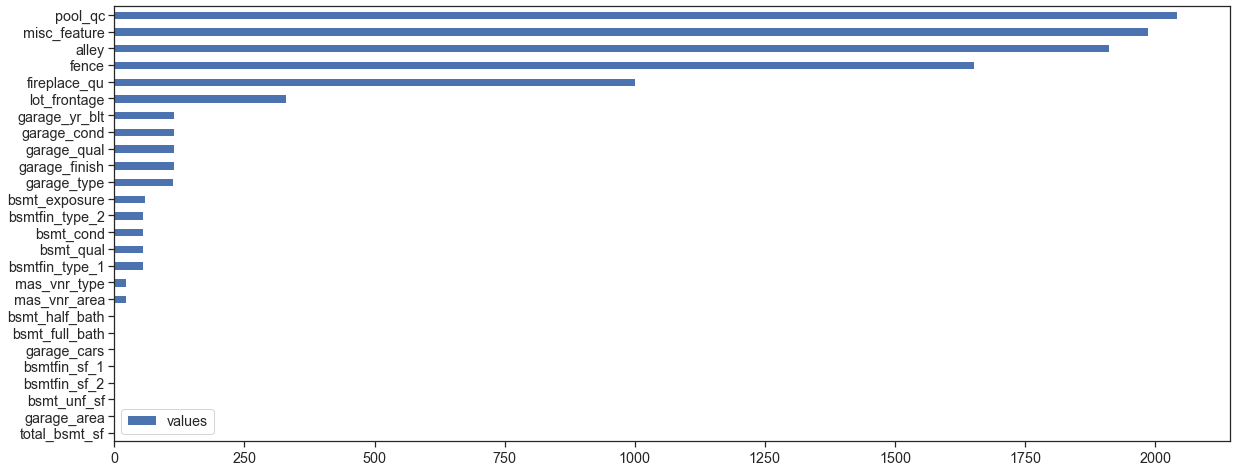

In [12]:
# visualize no of null values per column

missing_data = ames.isnull().sum()
missing_df = pd.DataFrame(missing_data.drop(missing_data[missing_data == 0].index).sort_values(ascending=True),
                                 columns = ['values'])

missing_df.plot(kind='barh',figsize=(20,8))

In [13]:
# Features with > 80% of null or zero values:

# 1. pool_qc: the null values refer to houses without any pool which corresponds with the same number of 'zero' in pool_area

print(ames.pool_qc.value_counts(dropna=False))

# 2. misc_feature: the null values refer to houses without any additional  features like a 2nd garage, elevator, shed.
print('\n')
print(ames.misc_feature.value_counts(dropna=False))

# 3. alley: the null values refer to houses without any alley
print('\n')
print(ames.alley.value_counts(dropna=False))

# 4. fence: refer to houses without fencing  around the house
print('\n')
print(ames.alley.value_counts(dropna=False))


NaN    2042
3.0       4
1.0       2
2.0       2
4.0       1
Name: pool_qc, dtype: int64


NaN     1986
Shed      56
Gar2       4
Othr       3
TenC       1
Elev       1
Name: misc_feature, dtype: int64


NaN     1911
Grvl      85
Pave      55
Name: alley, dtype: int64


NaN     1911
Grvl      85
Pave      55
Name: alley, dtype: int64


In [14]:
# drop columns with > 80% null values

drop = ['pool_qc','misc_feature','alley','fence']

drop_cols(ames, drop)
drop_cols(test,drop)

In [15]:
# 5. fireplace_qu: the null values refer to houses without any fireplace which corresponds with the same number of 'zero' in fireplaces.

print(ames.fireplace_qu.value_counts(dropna=False))
print('\n')
print(ames.fireplaces.value_counts(dropna=False))

NaN    1000
4.0     523
3.0     407
2.0      59
1.0      31
5.0      31
Name: fireplace_qu, dtype: int64


0    1000
1     898
2     146
3       6
4       1
Name: fireplaces, dtype: int64


In [16]:
# fill null values with 'None' in 'fireplace_qu'

ames['fireplace_qu'] = ames['fireplace_qu'].fillna(0.0)
test['fireplace_qu'] = test['fireplace_qu'].fillna(0.0)

In [17]:
# 6. lot_frontage: null values refer to houses without any lot area
print(ames.lot_frontage.value_counts(dropna=False))

NaN      330
60.0     179
70.0      96
80.0      94
50.0      90
65.0      71
75.0      68
85.0      52
63.0      38
24.0      33
78.0      33
21.0      32
64.0      31
74.0      31
90.0      31
72.0      30
62.0      28
68.0      28
73.0      25
100.0     23
82.0      21
43.0      20
52.0      20
57.0      20
79.0      19
66.0      19
67.0      18
53.0      18
59.0      18
51.0      16
76.0      16
88.0      16
56.0      15
84.0      14
69.0      14
81.0      14
55.0      14
58.0      13
91.0      13
71.0      13
40.0      13
92.0      13
35.0      13
44.0      12
48.0      11
34.0      11
96.0      11
30.0      11
77.0      11
41.0      11
95.0      11
61.0      10
83.0      10
105.0      9
107.0      9
110.0      9
93.0       9
87.0       8
120.0      8
45.0       8
94.0       8
42.0       8
102.0      7
98.0       7
86.0       7
89.0       6
54.0       6
47.0       6
32.0       6
37.0       6
103.0      5
36.0       5
39.0       4
97.0       4
38.0       4
108.0      4
129.0      4

In [18]:
# fill null values with 0.0 in 'lot_frontage'

ames['lot_frontage'] = ames['lot_frontage'].fillna(0.0)
test['lot_frontage'] = test['lot_frontage'].fillna(0.0)

In [19]:
# 7. garage-related features i.e. garage_yr_blt, garage_cond, garage_qual, garage_finish have the same 114 null values but garage type has 113 null values.

print(ames.garage_yr_blt.value_counts(dropna=False))
print('\n')
print(ames.garage_cond.value_counts(dropna=False))
print('\n')
print(ames.garage_qual.value_counts(dropna=False))
print('\n')
print(ames.garage_finish.value_counts(dropna=False))
print('\n')
print(ames.garage_type.value_counts(dropna=False))

NaN       114
2005.0    105
2007.0     84
2006.0     80
2004.0     72
2003.0     66
1977.0     46
1998.0     45
2008.0     44
2000.0     41
2002.0     40
1999.0     39
1976.0     35
1993.0     34
1978.0     33
1968.0     32
1950.0     32
1958.0     32
1996.0     31
1956.0     31
1966.0     29
1965.0     27
2001.0     27
1997.0     26
1967.0     26
1995.0     26
1964.0     25
1979.0     25
1994.0     25
1954.0     25
1962.0     25
1975.0     25
1959.0     23
1963.0     22
1992.0     22
1980.0     22
1920.0     21
1960.0     21
1990.0     21
1930.0     20
1970.0     20
1973.0     20
1961.0     20
1957.0     20
1940.0     20
1953.0     19
1974.0     19
1969.0     18
1971.0     18
2009.0     17
1972.0     17
1987.0     16
1939.0     16
1955.0     15
1948.0     14
1988.0     14
1985.0     12
1951.0     12
1989.0     12
1981.0     11
1984.0     11
1952.0     10
1991.0     10
1945.0     10
1986.0     10
1949.0     10
1941.0     10
1926.0      8
1935.0      7
1936.0      7
1983.0      7
1922.0

In [20]:
# one anomaly - row no. 1712, which indicates that it does not have a garage and yet has a value for garage_type

filter_garage = ames[(ames['garage_yr_blt'].isnull()) & (ames['garage_type'].notnull()) ]
filter_garage[['garage_yr_blt', 'garage_cond', 'garage_qual', 'garage_finish','garage_type']]

garage_yr_blt  garage_cond  garage_qual garage_finish garage_type
1712            NaN          NaN          NaN           NaN      Detchd

In [21]:
# drop the anomalous row #1712

row = 1712
drop_rows(ames,row)

In [22]:
# fill null values with 'None' or 0.0

ames['garage_type'] = ames['garage_type'].fillna('None')
ames['garage_finish'] = ames['garage_finish'].fillna('None')
ames['garage_qual'] = ames['garage_qual'].fillna(0.0)
ames['garage_cond'] = ames['garage_cond'].fillna(0.0)
ames['garage_yr_blt'] = ames['garage_yr_blt'].fillna(0.0)

test['garage_type'] = test['garage_type'].fillna('None')
test['garage_finish'] = test['garage_finish'].fillna('None')
test['garage_qual'] = test['garage_qual'].fillna(0.0)
test['garage_cond'] = test['garage_cond'].fillna(0.0)
test['garage_yr_blt'] = test['garage_yr_blt'].fillna(0.0)

In [23]:
# 8. basement-related features
print(ames.bsmt_exposure.value_counts(dropna=False))

# 2. 
print('\n')
print(ames.bsmtfin_type_2.value_counts(dropna=False))

# 3. 
print('\n')
print(ames.bsmt_cond.value_counts(dropna=False))

# 3. 
print('\n')
print(ames.bsmt_qual.value_counts(dropna=False))

# 3. 
print('\n')
print(ames.bsmtfin_type_1.value_counts(dropna=False))

filter_bsmt = ames[ames['bsmt_exposure'].isnull()]
filter_bsmt[['bsmt_exposure', 'bsmtfin_type_2', 'bsmt_cond', 'bsmt_qual','bsmtfin_type_1']]

1.0    1338
3.0     288
4.0     203
2.0     163
NaN      58
Name: bsmt_exposure, dtype: int64


Unf    1748
Rec      80
LwQ      60
NaN      56
BLQ      48
ALQ      35
GLQ      23
Name: bsmtfin_type_2, dtype: int64


3.0    1833
4.0      89
2.0      65
NaN      55
1.0       5
5.0       3
Name: bsmt_cond, dtype: int64


3.0    887
4.0    863
5.0    184
2.0     60
NaN     55
1.0      1
Name: bsmt_qual, dtype: int64


GLQ    615
Unf    603
ALQ    292
BLQ    200
Rec    183
LwQ    102
NaN     55
Name: bsmtfin_type_1, dtype: int64


bsmt_exposure bsmtfin_type_2  bsmt_cond  bsmt_qual bsmtfin_type_1
12              NaN            NaN        NaN        NaN            NaN
93              NaN            NaN        NaN        NaN            NaN
114             NaN            NaN        NaN        NaN            NaN
146             NaN            NaN        NaN        NaN            NaN
183             NaN            NaN        NaN        NaN            NaN
240             NaN            NaN        NaN        NaN            NaN
249             NaN            NaN        NaN        NaN            NaN
256             NaN            NaN        NaN        NaN            NaN
390             NaN            NaN        NaN        NaN            NaN
437             NaN            NaN        NaN        NaN            NaN
485             NaN            NaN        NaN        NaN            NaN
499             NaN            NaN        NaN        NaN            NaN
514             NaN            NaN        NaN        NaN            NaN
580             NaN            NaN        NaN        NaN            NaN
581             NaN            NaN        NaN        NaN            NaN
616             NaN            NaN        NaN        NaN            NaN
635             NaN            NaN        NaN        NaN            NaN
642             NaN            NaN        NaN        NaN            NaN
696             NaN            NaN        NaN        NaN            NaN
700             NaN            NaN        NaN        NaN            NaN
737             NaN            NaN        NaN        NaN            NaN
772             NaN            NaN        NaN        NaN            NaN
790             NaN            NaN        NaN        NaN            NaN
794             NaN            NaN        NaN        NaN            NaN
924             NaN            NaN        NaN        NaN            NaN
933             NaN            NaN        NaN        NaN            NaN
954             NaN            NaN        NaN        NaN            NaN
1007            NaN            NaN        NaN        NaN            NaN
1022            NaN            NaN        NaN        NaN            NaN
1049            NaN            NaN        NaN        NaN            NaN
1089            NaN            NaN        NaN        NaN            NaN
1098            NaN            NaN        NaN        NaN            NaN
1125            NaN            NaN        NaN        NaN            NaN
1157            NaN            NaN        NaN        NaN            NaN
1211            NaN            NaN        NaN        NaN            NaN
1222            NaN            NaN        NaN        NaN            NaN
1252            NaN            NaN        NaN        NaN            NaN
1256            NaN            NaN        NaN        NaN            NaN
1270            NaN            NaN        NaN        NaN            NaN
1327            NaN            NaN        NaN        NaN            NaN
1331            NaN            NaN        NaN        NaN            NaN
1377            NaN            NaN        NaN        NaN            NaN
1387            NaN            NaN        NaN        NaN            NaN
1428            NaN            NaN        NaN        NaN            NaN
1456            NaN            Unf        3.0        4.0            Unf
1481            NaN            NaN        NaN        NaN            NaN
1547            NaN            Unf        3.0        4.0            Unf
1594            NaN            NaN        NaN        NaN            NaN
1620            NaN            NaN        NaN        NaN            NaN
1681            NaN            NaN        NaN        NaN            NaN
1684            NaN            NaN        NaN        NaN            NaN
1686            NaN            NaN        NaN        NaN            NaN
1859            NaN            NaN        NaN        NaN            NaN
1875            NaN            NaN        NaN        NaN            NaN
1889            NaN            NaN        NaN 

In [24]:
# there are there anomalous rows relating to basement features: # 1997, 1546, 1456
# for these rows, the basement is unfinished, therefore the basement exposure is NaN, therefore I will replace the null values with 'None'.
# fill null values with None

ames['bsmt_exposure'] = ames['bsmt_exposure'].fillna(0.0)
ames['bsmt_cond'] = ames['bsmt_cond'].fillna(0.0)
ames['bsmt_qual'] = ames['bsmt_qual'].fillna(0.0)
ames['bsmtfin_type_1'] = ames['bsmtfin_type_1'].fillna('None')
ames['bsmtfin_type_2'] = ames['bsmtfin_type_2'].fillna('None')

test['bsmt_exposure'] = test['bsmt_exposure'].fillna(0.0)
test['bsmt_cond'] = test['bsmt_cond'].fillna(0.0)
test['bsmt_qual'] = test['bsmt_qual'].fillna(0.0)
test['bsmtfin_type_1'] = test['bsmtfin_type_1'].fillna('None')
test['bsmtfin_type_2'] = test['bsmtfin_type_2'].fillna('None')

In [25]:
# 9. Masonry veneer related features
print(ames.mas_vnr_area.value_counts(dropna=False))

print('\n')
print(ames.mas_vnr_type.value_counts(dropna=False))

0.0       1215
NaN         22
120.0       11
176.0       10
200.0       10
72.0         9
180.0        9
16.0         9
108.0        9
210.0        9
132.0        8
40.0         8
186.0        7
170.0        7
144.0        7
128.0        6
60.0         6
203.0        6
178.0        6
340.0        6
84.0         6
140.0        6
256.0        6
288.0        5
112.0        5
164.0        5
504.0        5
360.0        5
300.0        5
160.0        5
168.0        5
252.0        5
260.0        5
216.0        5
148.0        5
272.0        5
44.0         5
174.0        5
320.0        5
143.0        5
76.0         5
106.0        5
145.0        5
302.0        5
336.0        4
68.0         4
136.0        4
456.0        4
172.0        4
232.0        4
192.0        4
80.0         4
126.0        4
240.0        4
196.0        4
513.0        4
130.0        4
242.0        4
183.0        4
246.0        4
50.0         4
30.0         4
270.0        4
150.0        3
289.0        3
85.0         3
238.0     

In [26]:
# fill null values with None or 0.0

ames['mas_vnr_area'] = ames['mas_vnr_area'].fillna(0.0)
ames['mas_vnr_type'] = ames['mas_vnr_type'].fillna('None')

test['mas_vnr_area'] = test['mas_vnr_area'].fillna(0.0)
test['mas_vnr_type'] = test['mas_vnr_type'].fillna('None')

In [27]:
# isolate rows with 1 or 2 null values on train set

filter_basement = ames[(ames['bsmt_half_bath'].isnull()) | (ames['bsmt_full_bath'].isnull()) | (ames['total_bsmt_sf'].isnull()) | (ames['bsmt_unf_sf'].isnull()) | (ames['bsmtfin_sf_2'].isnull()) | (ames['bsmtfin_sf_1'].isnull())]
filter_basement

id        pid ms_subclass ms_zoning  lot_frontage  lot_area street  \
616   1498  908154080          20        RL         123.0     47007   Pave   
1327  1342  903230120          20        RM          99.0      5940   Pave   

      lot_shape land_contour utilities lot_config land_slope neighborhood  \
616           2          Lvl    AllPub     Inside        Gtl      Edwards   
1327          2          Lvl    AllPub        FR3        Gtl      BrkSide   

     condition_1 condition_2 bldg_type house_style  overall_qual  \
616         Norm        Norm      1Fam      1Story             5   
1327       Feedr        Norm      1Fam      1Story             4   

      overall_cond  year_built  year_remod/add roof_style roof_matl  \
616              7        1959            1996      Gable   CompShg   
1327             7        1946            1950      Gable   CompShg   

     exterior_1st exterior_2nd mas_vnr_type  mas_vnr_area  exter_qual  \
616       Plywood      Plywood         None           0.0           3   
1327      MetalSd       CBlock         None           0.0           3   

      exter_cond foundation  bsmt_qual  bsmt_cond  bsmt_exposure  \
616            3       Slab        0.0        0.0            0.0   
1327           3      PConc        0.0        0.0            0.0   

     bsmtfin_type_1  bsmtfin_sf_1 bsmtfin_type_2  bsmtfin_sf_2  bsmt_unf_sf  \
616            None           0.0           None           0.0          0.0   
1327           None           NaN           None           NaN          NaN   

      total_bsmt_sf heating  heating_qc central_air electrical  1st_flr_sf  \
616             0.0    GasA           3           Y      SBrkr        3820   
1327            NaN    GasA           3           Y      FuseA         896   

      2nd_flr_sf  low_qual_fin_sf  gr_liv_area  bsmt_full_bath  \
616            0                0         3820             NaN   
1327           0                0          896             NaN   

      bsmt_half_bath  full_bath  half_bath  bedroom_abvgr  kitchen_abvgr  \
616              NaN          3          1              5              1   
1327             NaN          1          0              2              1   

      kitchen_qual  totrms_abvgrd functional  fireplaces  fireplace_qu  \
616              5             11        Typ           2           4.0   
1327             3              4        Typ           0           0.0   

     garage_type  garage_yr_blt garage_finish  garage_cars  garage_area  \
616       Attchd         1959.0           Unf          2.0        624.0   
1327      Detchd         1946.0           Unf          1.0        280.0   

      garage_qual  garage_cond paved_drive  wood_deck_sf  open_porch_sf  \
616           3.0          3.0           Y             0            372   
1327          3.0          3.0           Y             0              0   

      enclosed_porch  3ssn_porch  screen_porch  pool_area  misc_val  mo_sold  \
616                0           0             0          0         0        7   
1327               0           0             0          0         0        4   

      yr_sold sale_type  saleprice  
616      2008       WD      284700  
1327     2008     ConLD      79000

In [28]:
# fill null values 0.0

ames['bsmt_half_bath'] = ames['bsmt_half_bath'].fillna(0.0)
ames['bsmt_full_bath'] = ames['bsmt_full_bath'].fillna(0.0)
ames['total_bsmt_sf'] = ames['total_bsmt_sf'].fillna(0.0)
ames['bsmt_unf_sf'] = ames['bsmt_unf_sf'].fillna(0.0)
ames['bsmtfin_sf_2'] = ames['bsmtfin_sf_2'].fillna(0.0)
ames['bsmtfin_sf_1'] = ames['bsmtfin_sf_1'].fillna(0.0)

test['bsmt_half_bath'] = test['bsmt_half_bath'].fillna(0.0)
test['bsmt_full_bath'] = test['bsmt_full_bath'].fillna(0.0)
test['total_bsmt_sf'] = test['total_bsmt_sf'].fillna(0.0)
test['bsmt_unf_sf'] = test['bsmt_unf_sf'].fillna(0.0)
test['bsmtfin_sf_2'] = test['bsmtfin_sf_2'].fillna(0.0)
test['bsmtfin_sf_1'] = test['bsmtfin_sf_1'].fillna(0.0)
test['electrical'] = test['electrical'].fillna(0.0)

In [29]:
# verify if there are any more null values left 
print('There are null values in train set: ',ames.isnull().values.any())
print('There are null values in test set: ',test.isnull().values.any())

There are null values in train set:  False
There are null values in test set:  False


In [30]:
# count and % of zero values per column

rows = []

for col in ames.columns:
    
    count = (ames[col] == 0).sum()
    percent_zero = round(count/2051 * 100,2)
    datatype = ames[col].dtype
    rows.append([col,count,percent_zero,datatype])

df = pd.DataFrame(rows, columns=["column_name","count","percent_zero","datatype"])

df[df['percent_zero']>0].sort_values(by=['percent_zero'],ascending=False).head(10)

column_name  count  percent_zero datatype
71        pool_area   2041         99.51    int64
69       3ssn_porch   2024         98.68    int64
45  low_qual_fin_sf   2017         98.34    int64
72         misc_val   1985         96.78    int64
48   bsmt_half_bath   1924         93.81  float64
70     screen_porch   1869         91.13    int64
36     bsmtfin_sf_2   1803         87.91  float64
68   enclosed_porch   1724         84.06    int64
50        half_bath   1307         63.73    int64
26     mas_vnr_area   1237         60.31  float64

In [31]:
# drop columns with > 90% zero values

drop = ['pool_area','3ssn_porch','low_qual_fin_sf','misc_val','bsmt_half_bath','screen_porch']

drop_cols(ames,drop)
drop_cols(test,drop)

In [32]:
ames.head()

id        pid ms_subclass ms_zoning  lot_frontage  lot_area street  \
0  109  533352170          60        RL           0.0     13517   Pave   
1  544  531379050          60        RL          43.0     11492   Pave   
2  153  535304180          20        RL          68.0      7922   Pave   
3  318  916386060          60        RL          73.0      9802   Pave   
4  255  906425045          50        RL          82.0     14235   Pave   

   lot_shape land_contour utilities lot_config land_slope neighborhood  \
0          2          Lvl    AllPub    CulDSac        Gtl       Sawyer   
1          2          Lvl    AllPub    CulDSac        Gtl      SawyerW   
2          3          Lvl    AllPub     Inside        Gtl        NAmes   
3          3          Lvl    AllPub     Inside        Gtl       Timber   
4          2          Lvl    AllPub     Inside        Gtl      SawyerW   

  condition_1 condition_2 bldg_type house_style  overall_qual  overall_cond  \
0        RRAe        Norm      1Fam      2Story             6             8   
1        Norm        Norm      1Fam      2Story             7             5   
2        Norm        Norm      1Fam      1Story             5             7   
3        Norm        Norm      1Fam      2Story             5             5   
4        Norm        Norm      1Fam      1.5Fin             6             8   

   year_built  year_remod/add roof_style roof_matl exterior_1st exterior_2nd  \
0        1976            2005      Gable   CompShg      HdBoard      Plywood   
1        1996            1997      Gable   CompShg      VinylSd      VinylSd   
2        1953            2007      Gable   CompShg      VinylSd      VinylSd   
3        2006            2007      Gable   CompShg      VinylSd      VinylSd   
4        1900            1993      Gable   CompShg      Wd Sdng      Plywood   

  mas_vnr_type  mas_vnr_area  exter_qual  exter_cond foundation  bsmt_qual  \
0      BrkFace         289.0           4           3     CBlock        3.0   
1      BrkFace         132.0           4           3      PConc        4.0   
2         None           0.0           3           4     CBlock        3.0   
3         None           0.0           3           3      PConc        4.0   
4         None           0.0           3           3      PConc        2.0   

   bsmt_cond  bsmt_exposure bsmtfin_type_1  bsmtfin_sf_1 bsmtfin_type_2  \
0        3.0            1.0            GLQ         533.0            Unf   
1        3.0            1.0            GLQ         637.0            Unf   
2        3.0            1.0            GLQ         731.0            Unf   
3        3.0            1.0            Unf           0.0            Unf   
4        4.0            1.0            Unf           0.0            Unf   

   bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf heating  heating_qc central_air  \
0           0.0        192.0          725.0    GasA           5           Y   
1           0.0        276.0          913.0    GasA           5           Y   
2           0.0        326.0         1057.0    GasA           3           Y   
3           0.0        384.0          384.0    GasA           4           Y   
4           0.0        676.0          676.0    GasA           3           Y   

  electrical  1st_flr_sf  2nd_flr_sf  gr_liv_area  bsmt_full_bath  full_bath  \
0      SBrkr         725         754         1479             0.0          2   
1      SBrkr         913        1209         2122             1.0          2   
2      SBrkr        1057           0         1057             1.0          1   
3      SBrkr         744         700         1444             0.0          2   
4      SBrkr         831         614         1445             0.0          2   

   half_bath  bedroom_abvgr  kitchen_abvgr  kitchen_qual  totrms_abvgrd  \
0          1              3              1             4              6   
1          1              4              1             4              8   
2          0              3              1             4 

In [33]:
len(ames.iloc[3].isnull())

71

In [34]:
# drop outliers

ames.drop(ames[ames['gr_liv_area'] > 4500].index, inplace = True)

In [35]:
# create a new column on age_sold

ames['age_sold'] = ames['yr_sold'] - ames['year_built']
test['age_sold'] = test['yr_sold'] - test['year_built']

In [36]:
drop = ['yr_sold','year_built']

drop_cols(ames,drop)
drop_cols(test,drop)

In [37]:
# to verify if value 'NA' still exists in the dataframe:

exists1 = 'NA' in ames.values
print(f'"NA" is in the train set: {exists1}')

exists2 = 'NA' in test.values
print(f'"NA" is in the test set: {exists2}')

"NA" is in the train set: False
"NA" is in the test set: False


## Visualizing Data

In [38]:
# create function to categorise columns into numerical or categorical datatypes

def col_list(df):
    
    col_numerical = []
    col_categorical = []

    for c in df.columns:
        if df[c].dtype != object:
            col_numerical.append(c)
        
        else: 
            col_categorical.append(c)
            
    return col_numerical, col_categorical



In [39]:
# separate ames train set into two: numerical data and categorical data

col_num = col_list(ames)[0]
col_cat = col_list(ames)[1]

In [40]:
len(col_num)

42

In [41]:
# split numeric columns into two to prepare for corr heatmap 

first_half=col_num[3:23]
sec_half=col_num[23:]

Text(0.5, 1.0, 'Correlation Heatmap of Ames Housing Dataset 1')

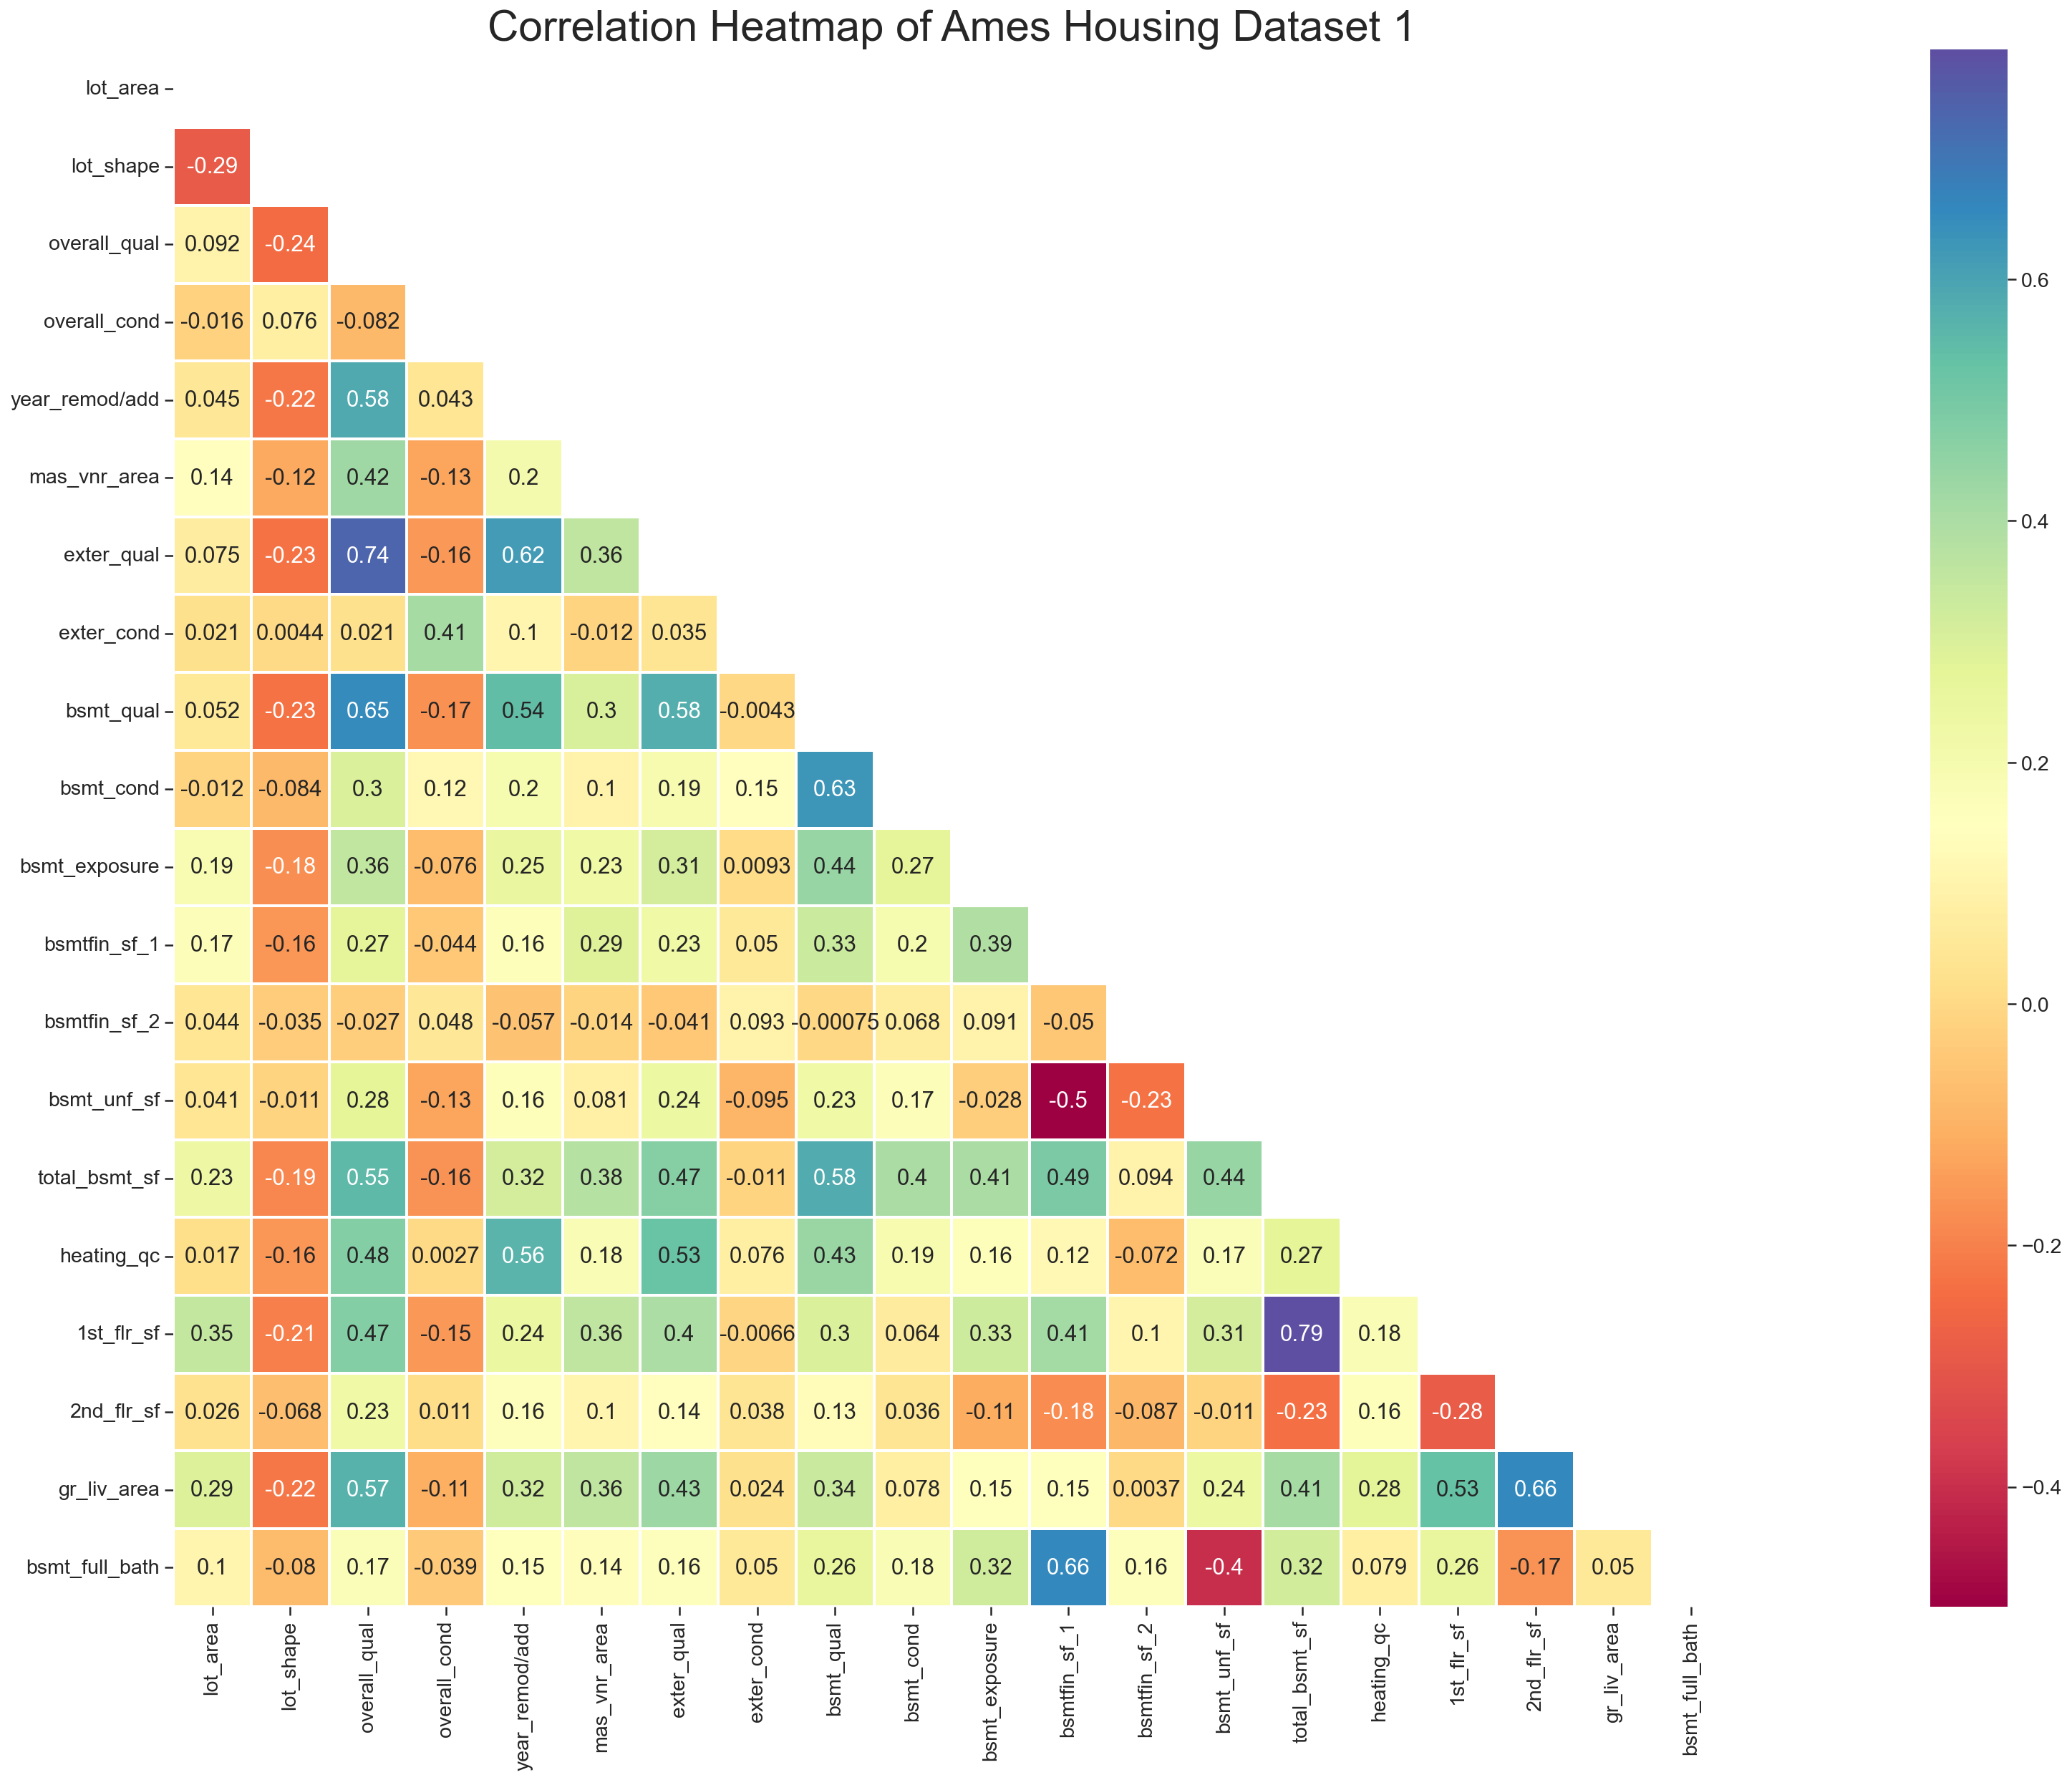

In [42]:
#correlation heatmap 1st half of numeric data
%config InlineBackend.figure_format='retina'
fig,ax = plt.subplots(figsize=(50,20))
mask = np.triu(np.ones_like(ames[first_half].corr(), dtype=bool))
sns.heatmap(ames[first_half].corr(),annot=True,cmap='Spectral',linewidths=2,square=True,mask=mask)
ax.set_title('Correlation Heatmap of Ames Housing Dataset 1',fontsize = 30)

Text(0.5, 1.0, 'Correlation Heatmap of Ames Housing Dataset 2')

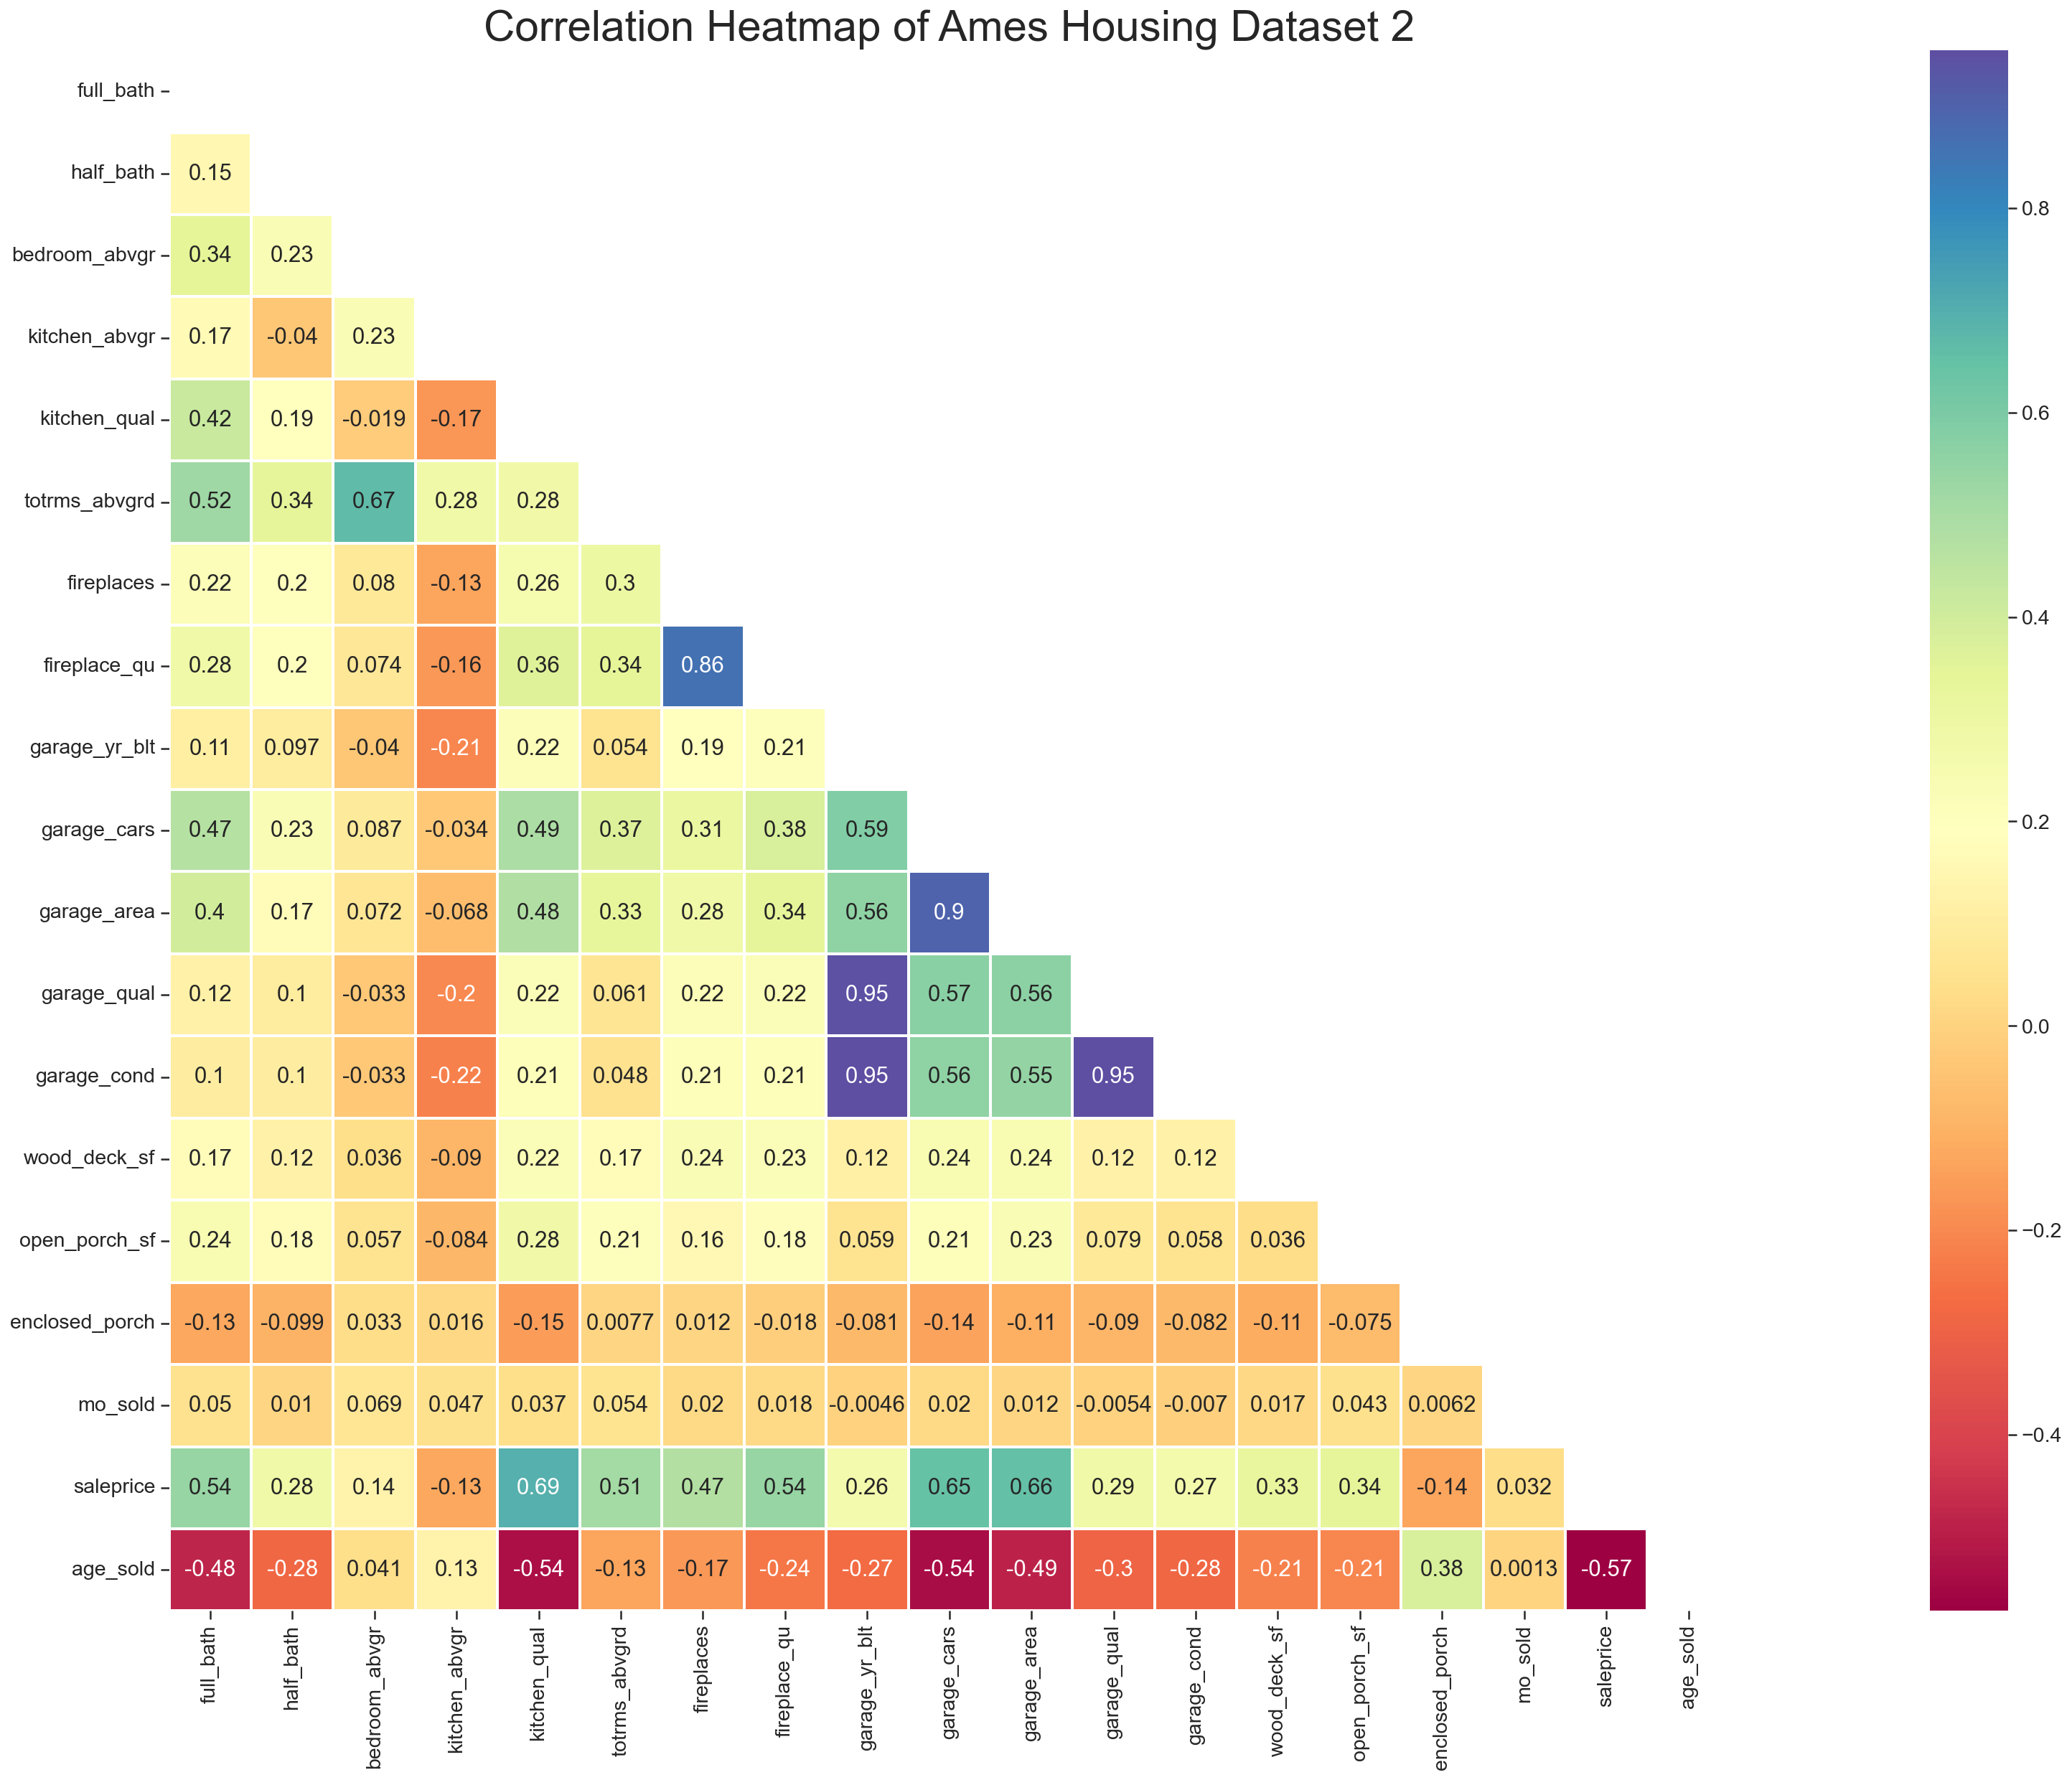

In [43]:
#correlation heatmap 2nd half of numeric data
%config InlineBackend.figure_format='retina'
fig,ax = plt.subplots(figsize=(50,20))
mask = np.triu(np.ones_like(ames[sec_half].corr(), dtype=bool))
sns.heatmap(ames[sec_half].corr(),annot=True,cmap='Spectral',linewidths=2,square=True,mask=mask)
ax.set_title('Correlation Heatmap of Ames Housing Dataset 2',fontsize = 30)

**Addressing Multicollinearity**

These features have high correlation to one another (> 0.75 correlation coefficient): 
  - garage_area / garage_cars*
  - gr_liv_area / totrms_abvgrd*
  - 1st_flr_sf / total_bsmt_sf*
  - garage_qual / garage_cond* / garage_yr_blt*
  - fireplaces / fireplace_qu*

*Drop these features

Multicollinearity refers the occurrence of high intercorrelations among two or more independent variables in a multiple regression model. Multicollinearity can lead to skewed or misleading results and will lead to wider confidence intervals that produce less reliable probabilities in terms of the effect of independent variables in a model. [Source](https://www.investopedia.com/terms/m/multicollinearity.asp)

In order to address this issue, I will drop either one variable of each pair of highly correlated features. 

In [44]:
# drop garage_cars, totrms_abvgrd, total_bsmt_sf

drop = ['garage_cars','totrms_abvgrd','total_bsmt_sf','garage_cond','garage_yr_blt','fireplace_qu']

drop_cols(ames,drop)
drop_cols(test,drop)

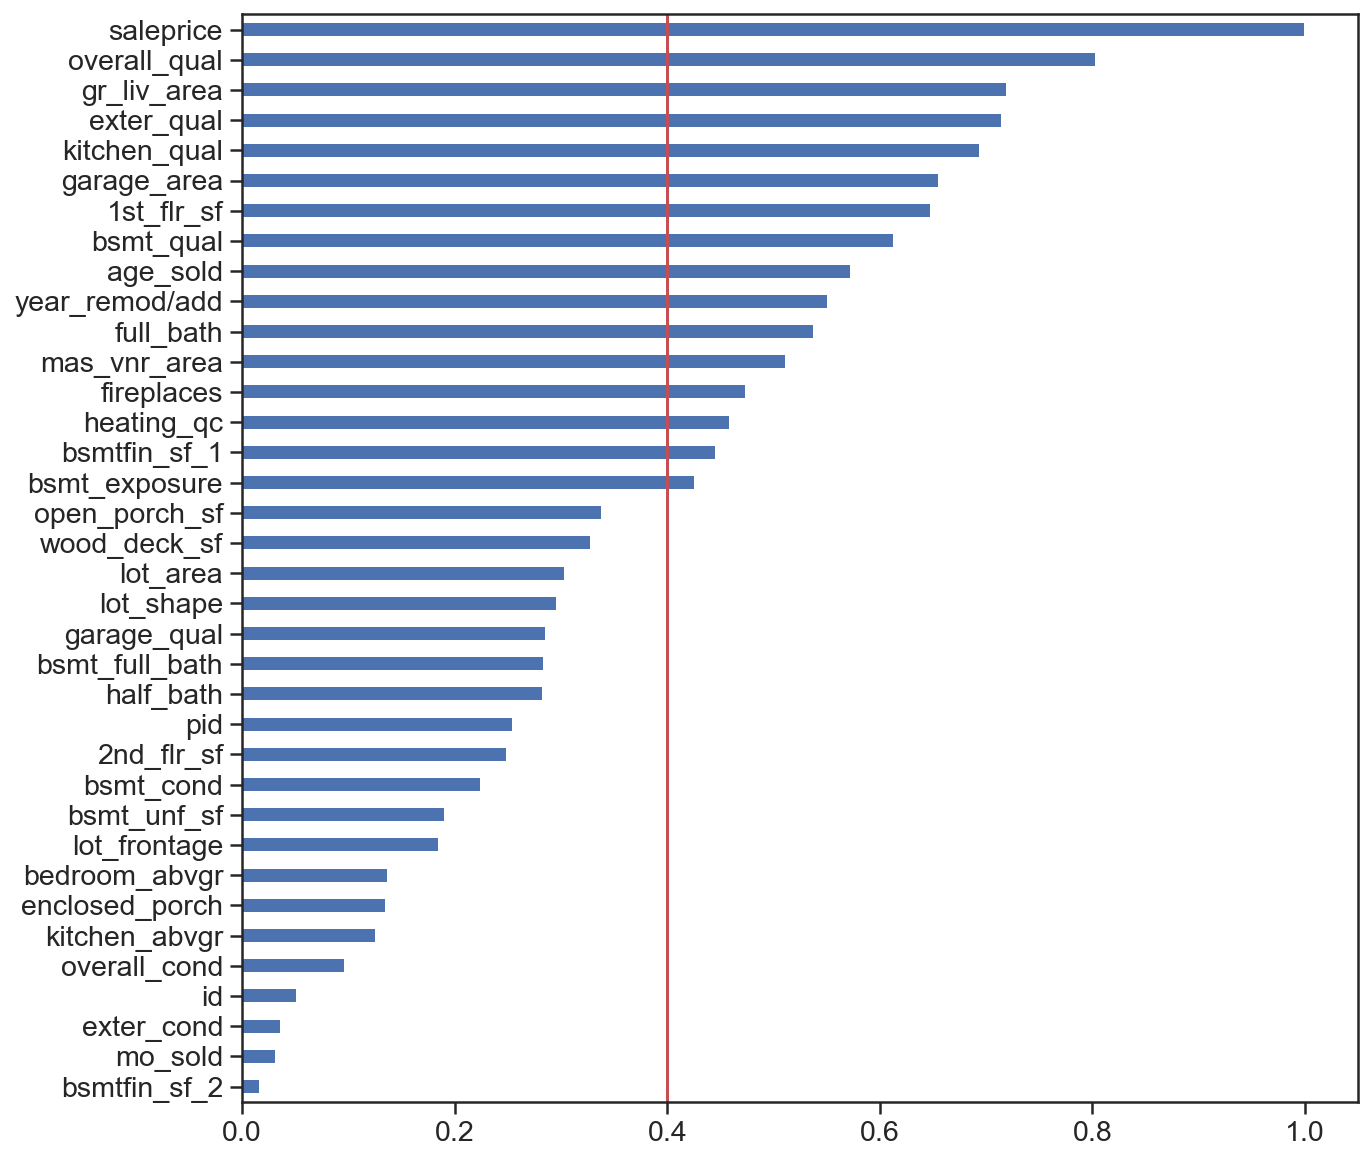

In [45]:
# plot absolute corr coefficient of variables against saleprice
# threshold set at 0.4


figure(figsize=(10, 10))

ames.corr().saleprice.abs().sort_values(ascending=True).plot(kind='barh')
plt.axvline(x=0.4,c='r')

In [46]:
# drop columns with < 0.4 correlation coefficient against sale_price

cols = ['pid','enclosed_porch','kitchen_abvgr','overall_cond',
        'bsmtfin_sf_2','mo_sold','exter_cond','bedroom_abvgr','lot_frontage','bsmt_unf_sf',
        '2nd_flr_sf','half_bath','bsmt_full_bath','lot_shape','lot_area','wood_deck_sf','open_porch_sf']

drop_cols(ames,cols)
drop_cols(test,cols)

In [47]:
ames.corr().saleprice.sort_values(ascending=False)

saleprice         1.000000
overall_qual      0.803464
gr_liv_area       0.719701
exter_qual        0.715027
kitchen_qual      0.694548
garage_area       0.655483
1st_flr_sf        0.648219
bsmt_qual         0.613414
year_remod/add    0.551091
full_bath         0.538468
mas_vnr_area      0.511225
fireplaces        0.473725
heating_qc        0.458903
bsmtfin_sf_1      0.446173
bsmt_exposure     0.426075
garage_qual       0.285662
bsmt_cond         0.225128
id               -0.051258
age_sold         -0.572515
Name: saleprice, dtype: float64

In [48]:
# created function to build histogram, boxplot and violin subplots for numerical variables 

def subplot_num(df,col_list):
    
    nrows=len(col_list)
    fig, ax = plt.subplots(nrows = nrows, ncols=3,figsize=(20,80),squeeze=False)
    ax = ax.ravel() 
    
    plt.subplots_adjust(hspace = 0.5)
    
    
    for i, col in enumerate(col_list): 
        sns.histplot(x=df[col],ax=ax[i*3],color='steelblue',kde=True)
        ax[i*3].axvline(df[col].mean(), color='red', lw=2)
        ax[i*3].axvline(df[col].median(), color='blue', ls='--', lw=2)
        ax[i*3].set_title(f'{col.capitalize()} histogram')
        
    for i, col in enumerate(col_list): 
        sns.boxplot(x=df[col],ax=ax[1+(i*3)])
        ax[1+(i*3)].set_title(f'{col.capitalize()} box plot')
    

    for i, col in enumerate(col_list): 
        sns.regplot(x=df[col],y=df['saleprice'],ax=ax[2+(i*3)],ci=None)
        ax[2+(i*3)].set_title(f'{col.capitalize()} v Saleprice scatter plot')
        
    plt.tight_layout()

In [49]:
# rerun function to split ames train set into two: numerical data and categorical data
# as some columns were dropped

col_num = col_list(ames)[0]
col_cat = col_list(ames)[1]

In [50]:
len(col_num)

19

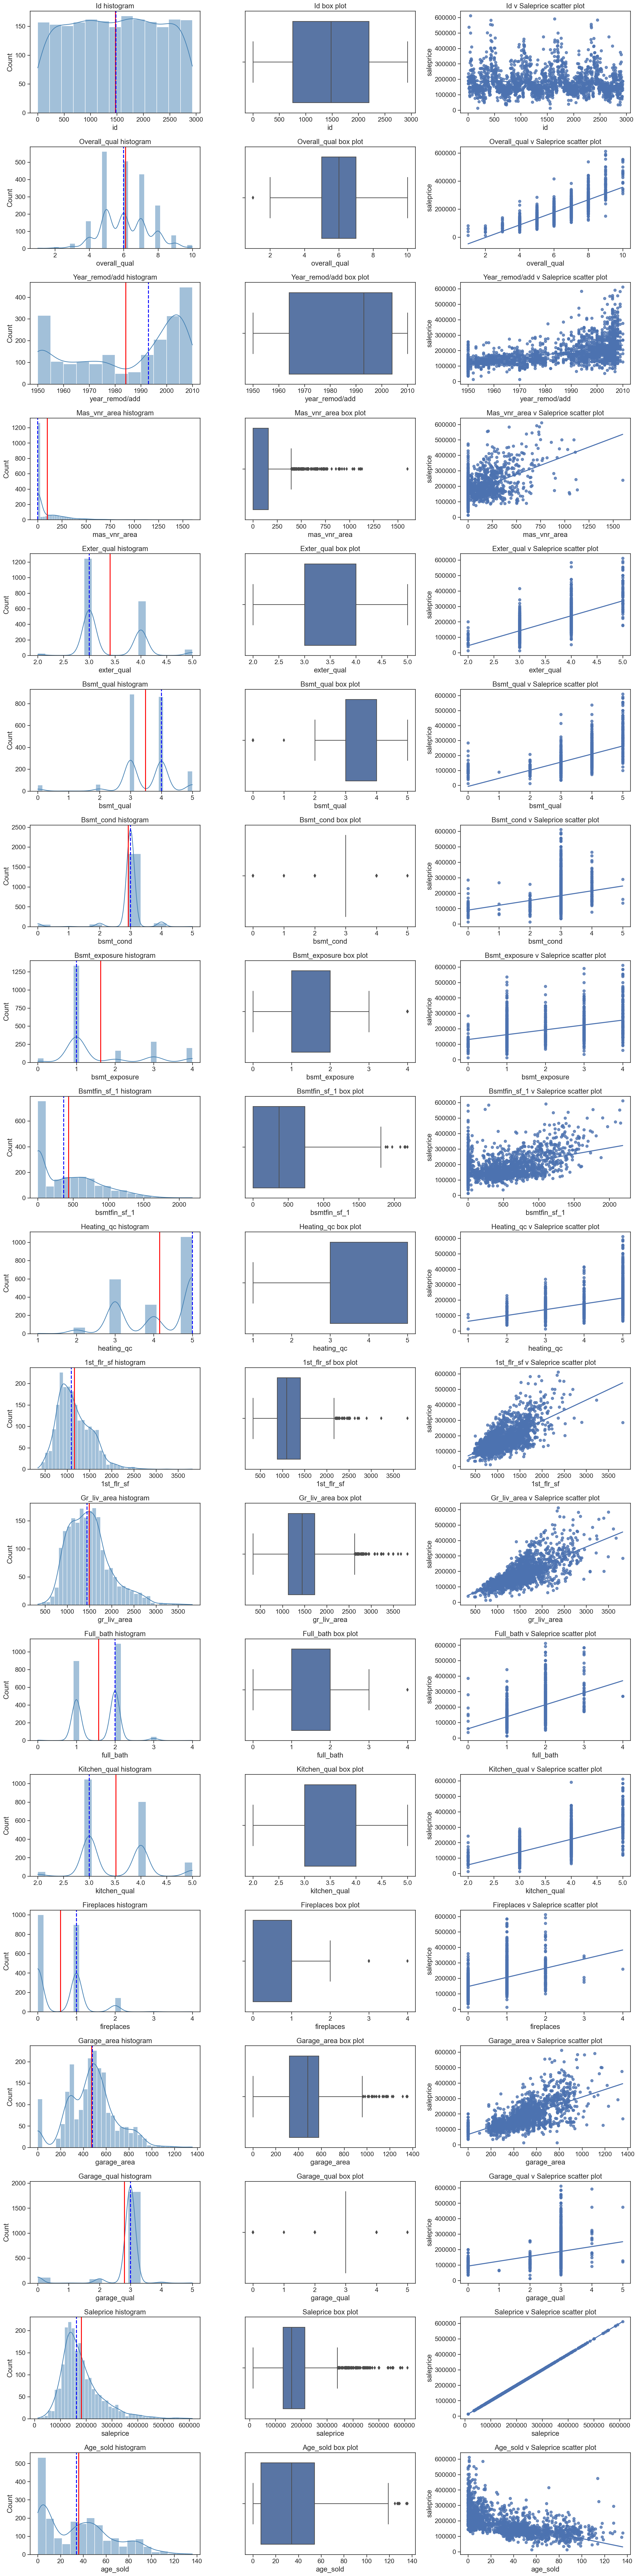

In [51]:
subplot_num(ames,col_num)

**Observations**
1. The distributions of mas_vnr_area and bsmtfin_sf_1 are strongly right-skewed, however their scatterplots against saleprice shows a somewhat positive linear relationship. I will keep these variables. 
2. The distribution of heating_qc is strongly left-skewed, however its scatterplot against saleprice show a somewhat positive linear relationship. I will keep this variable.  
3. The distribution and variance of garage_qual is highly concentrated on the value '3', however its scatterplot against saleprice show a somewhat positive linear relationship. I will keep this variable.  
4. The distribution of sale_price is strongly right-skewed. In future runs of this exercise, I will consider normalising the distribution.  

## Non-numeric, categorical data

In [52]:
ames.shape

(2048, 47)

In [53]:
# created function to build countplot and boxplot subplots for non-numeric variables 
# on count plot, i set an axis at x=1000 i.e. ~half of the total rows. 

def subplot_cat(df,col_list):
    
    nrows = len(col_list)
    fig, ax = plt.subplots(nrows = nrows, ncols=2,figsize=(20,200))
    ax = ax.ravel() 
    
    plt.subplots_adjust(hspace = 0.5)
    
    for i, col in enumerate(col_list): 
        sns.countplot(y = col, data = df,ax=ax[i*2],palette='RdBu')
        ax[i*2].set_title(f'{col.capitalize()} count plot',fontsize = 17)    
        ax[i*2].set_xlim(1, 2050)
        ax[i*2].axvline(1000,c='r')
        
    for i, col in enumerate(col_list): 
        sns.boxplot(x=df['saleprice'],y=df[col],ax=ax[1+(i*2)],palette='RdBu')
        ax[1+(i*2)].set_title(f'{col.capitalize()} v Saleprice box plot',fontsize = 17)
        
    plt.tight_layout()

In [54]:
subplot_cat(ames,col_cat)

In [55]:
# drop columns where one category is clearly dominating i.e. single category going beyond 1000 counts. 

drop = ['ms_zoning','street','land_contour','utilities','lot_config','land_slope','condition_1','condition_2','bldg_type','house_style','roof_style','roof_matl','mas_vnr_type','bsmt_qual','bsmt_cond','bsmt_exposure','bsmtfin_type_2','heating','central_air','electrical','functional','garage_type','paved_drive','sale_type']

drop_cols(ames,drop)
drop_cols(test,drop)

In [56]:
print(ames.shape)
print(test.shape)

(2048, 23)
(878, 22)


In [57]:
# to verify again that saleprice is the only differing column: 

len(ames.drop('saleprice', axis=1).columns) == len(test.columns)

True

In [58]:
# export cleaned datasets

ames.to_csv('./datasets/train_cleaned.csv')
test.to_csv('./datasets/test_cleaned.csv')